In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [18]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [21]:
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

In [22]:
y_pred = best_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [23]:
print("Meilleurs paramètres: ", grid_search.best_params_)

Meilleurs paramètres:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


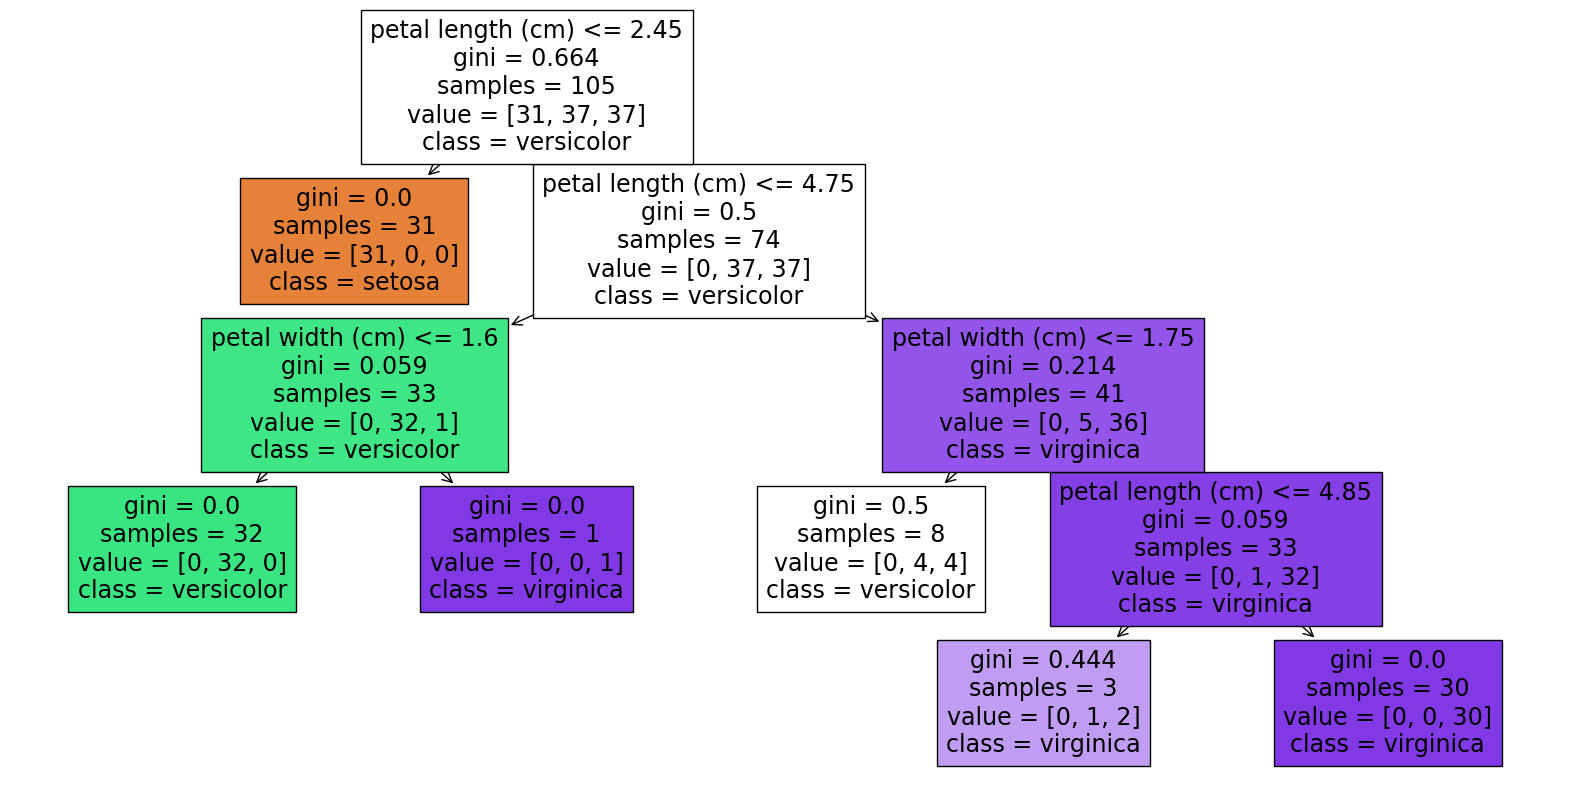

In [24]:
plt.figure(figsize=(20,10))
plot_tree(best_dt, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()